In [57]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [58]:
master = pd.read_excel("Suicide_Master_data_with_otherinfo.xlsx",index_col="State_UT")

In [59]:
master.shape

(36, 25)

In [60]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, ANDHRA PRADESH to PUDUCHERRY
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sl. No.                        36 non-null     int64  
 1   Male_suicides                  36 non-null     int64  
 2   Female_suicides                36 non-null     int64  
 3   Transgender_suicides           36 non-null     int64  
 4   Number_Suicides                36 non-null     int64  
 5   Perc_share                     36 non-null     float64
 6   Pop_in_Lakh                    36 non-null     float64
 7   Male_suicide_rate              36 non-null     float64
 8   Female_suicide_rate            36 non-null     float64
 9   Suicide_Rate                   36 non-null     float64
 10  Female_lit_rate                36 non-null     float64
 11  Male_lit_rate                  36 non-null     float64
 12  Total_lit_rate                 36 no

In [61]:
master.isnull().sum()

Sl. No.                          0
Male_suicides                    0
Female_suicides                  0
Transgender_suicides             0
Number_Suicides                  0
Perc_share                       0
Pop_in_Lakh                      0
Male_suicide_rate                0
Female_suicide_rate              0
Suicide_Rate                     0
Female_lit_rate                  0
Male_lit_rate                    0
Total_lit_rate                   0
Average_2019_Unemployment        9
QoW_sedatives                    0
QoW_Opioids                      0
Ganja                            0
Alcohol_total_perc               0
Alcohol_men_perc                 0
Top10_alcoholics_needing_help    0
Percapita_NSDP_2019              3
TFR_2017                         0
Perc_BPL                         5
Mean_Asset_Score_2016            6
Gini_Coefficient_2016            6
dtype: int64

In [62]:
master.head(40)

,Sl. No.,Male_suicides,Female_suicides,Transgender_suicides,Number_Suicides,Perc_share,Pop_in_Lakh,Male_suicide_rate,Female_suicide_rate,Suicide_Rate,...,QoW_Opioids,Ganja,Alcohol_total_perc,Alcohol_men_perc,Top10_alcoholics_needing_help,Percapita_NSDP_2019,TFR_2017,Perc_BPL,Mean_Asset_Score_2016,Gini_Coefficient_2016
State_UT,,,,,,,,,,,,,,,,,,,,,
ANDHRA PRADESH,1,4740,1725,0,6465,4.6,523.2,9.059633,3.297018,12.4,...,0.8,0.2,26.5,13.7,8,113927.263123,1.6,9.2,0.357,0.270
ARUNACHAL PRADESH,2,81,31,0,112,0.1,15.1,5.364238,2.052980,7.4,...,5.7,4.2,40.4,28.0,0,105064.063534,2.1,34.7,0.331,0.306
ASSAM,3,1679,691,0,2370,1.7,344.2,4.877978,2.007554,6.9,...,0.9,0.5,15.2,8.8,0,62795.613255,2.3,32.0,0.313,0.289
BIHAR,4,395,246,0,641,0.5,1201.1,0.328865,0.204812,0.5,...,0.1,1.1,1.7,0.9,0,31286.615814,3.2,33.7,0.227,0.401
CHHATTISGARH,5,5520,2109,0,7629,5.5,288.5,19.133449,7.310225,26.4,...,0.6,2.7,57.2,35.6,3,75277.729630,2.4,39.9,0.312,0.342
GOA,6,201,58,0,259,0.2,15.4,13.051948,3.766234,16.8,...,1.5,0.7,46.0,26.4,0,367226.470352,1.8,5.1,0.576,0.180
GUJARAT,7,5168,2486,1,7655,5.5,682.5,7.572161,3.642491,11.2,...,0.4,0.1,7.2,3.9,0,165358.840640,2.2,16.6,0.410,0.269
HARYANA,8,3297,894,0,4191,3.0,288.1,11.443943,3.103089,14.5,...,2.5,2.9,41.3,21.6,0,176199.105299,2.2,11.2,0.516,0.200
HIMACHAL PRADESH,9,377,207,0,584,0.4,73.2,5.150273,2.827869,8.0,...,1.7,3.2,17.6,8.9,0,142155.416182,1.6,8.1,0.491,0.200


In [63]:
## Capturing two of the dropped columns in order to add back to the workbook containing cluster information
Total_suicides = master['Number_Suicides']
State_Pop = master['Pop_in_Lakh']

In [64]:
master.columns
drop_cols = ["Sl. No.",'Male_suicides', 'Female_suicides', 'Transgender_suicides',
       'Number_Suicides', 'Perc_share', 'Pop_in_Lakh']

In [65]:
master.drop(columns = drop_cols, axis=1,inplace=True)

In [66]:
master.shape

(36, 18)

In [67]:
master.describe().T

,count,mean,std,min,25%,50%,75%,max
Male_suicide_rate,36.0,9.169160,7.345465,0.000000,4.438789,7.726759,12.488192,32.500000
Female_suicide_rate,36.0,3.646815,2.788660,0.000000,1.573666,3.463575,5.097100,12.750000
Suicide_Rate,36.0,12.833333,10.070948,0.000000,5.875000,11.150000,17.100000,45.500000
Female_lit_rate,36.0,70.522222,11.003041,51.500000,59.950000,70.400000,79.800000,92.100000
Male_lit_rate,36.0,84.055556,6.790685,71.200000,78.475000,83.850000,90.075000,96.100000
Total_lit_rate,36.0,77.544444,8.650234,61.800000,70.050000,76.600000,85.850000,94.000000
Average_2019_Unemployment,27.0,8.674074,6.234478,1.541667,4.720833,6.416667,11.233333,27.391667
QoW_sedatives,36.0,0.442778,0.588157,0.010000,0.127500,0.225000,0.422500,2.910000
QoW_Opioids,36.0,1.630556,1.817505,0.100000,0.500000,0.800000,2.075000,6.900000
Ganja,36.0,1.547222,1.759624,0.000000,0.200000,0.700000,2.825000,7.300000


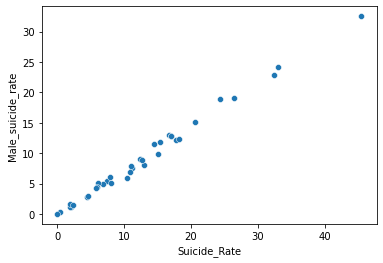

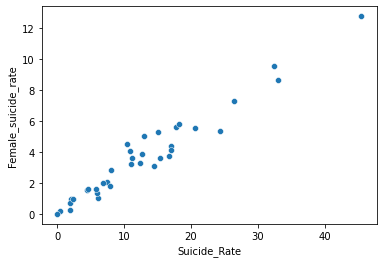

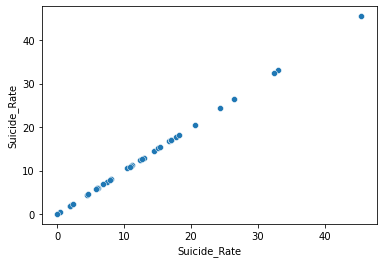

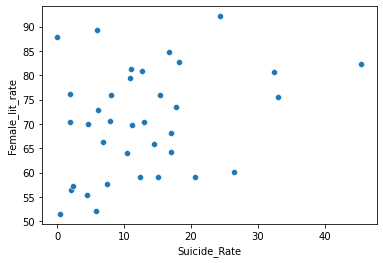

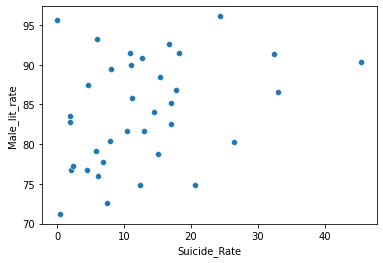

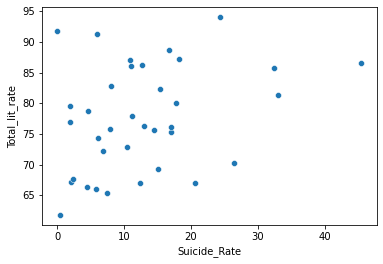

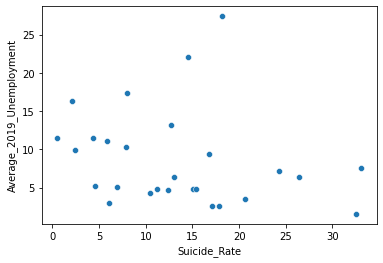

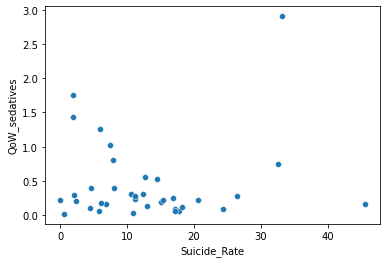

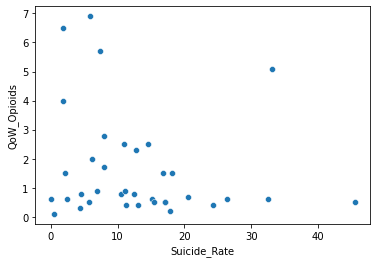

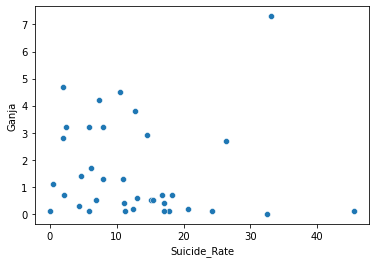

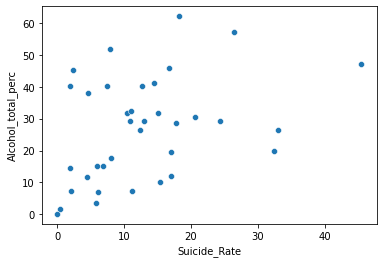

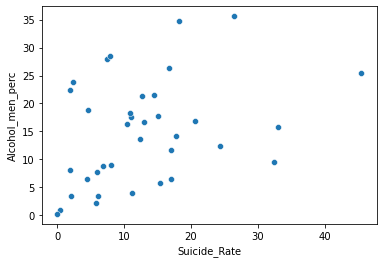

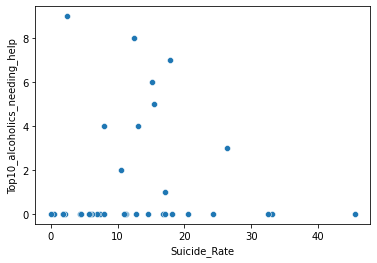

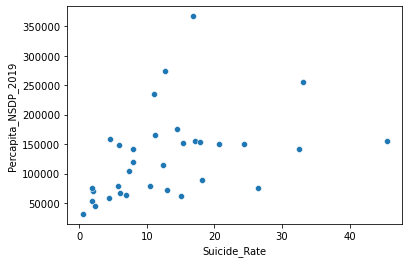

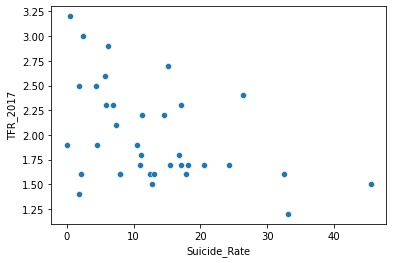

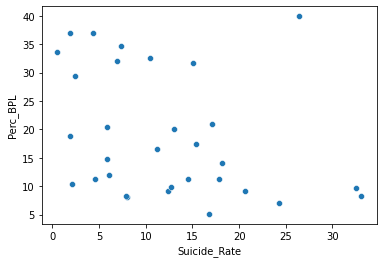

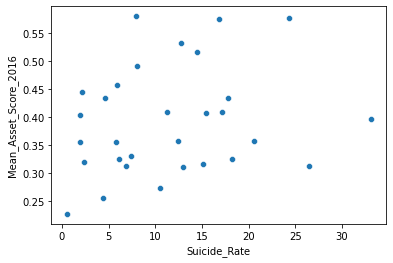

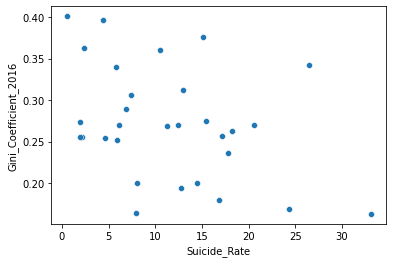

In [68]:
for i in master.columns:
    sns.scatterplot(data=master, x='Suicide_Rate', y=i)
    plt.show()
    

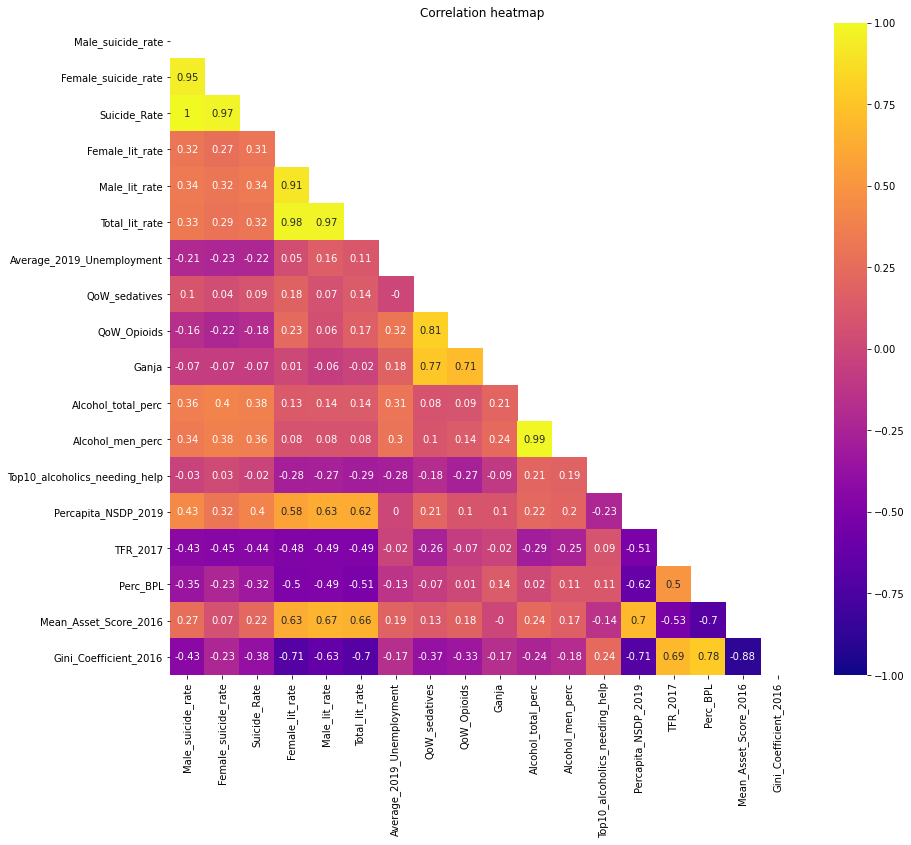

In [69]:
corr = master.corr()

mask = np.triu( np.ones_like(corr, dtype= np.bool))
plt.figure(figsize = (14,12))
## sns.set(font_scale=1.2) ## instead of annot_kws={‘size’:12}
sns.heatmap(round(corr,2), annot=True, mask=mask, cmap='plasma', vmin=-1, vmax=1, annot_kws={'size':10})
plt.title("Correlation heatmap");


In [70]:
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values()
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (abs(sorted_pairs) < 1)]  #direction not represented as we have taken absolute values
strong_pairs

Mean_Asset_Score_2016  Gini_Coefficient_2016   -0.877381
Gini_Coefficient_2016  Mean_Asset_Score_2016   -0.877381
                       Percapita_NSDP_2019     -0.710590
Percapita_NSDP_2019    Gini_Coefficient_2016   -0.710590
Female_lit_rate        Gini_Coefficient_2016   -0.707192
                                                  ...   
                       Total_lit_rate           0.982593
Alcohol_total_perc     Alcohol_men_perc         0.986100
Alcohol_men_perc       Alcohol_total_perc       0.986100
Suicide_Rate           Male_suicide_rate        0.996113
Male_suicide_rate      Suicide_Rate             0.996113
Length: 62, dtype: float64

In [71]:
### Dropping columns that have too much correlation & creating correaltion heatmap again

In [72]:
drop_cols1 = ['Male_suicide_rate', 'Female_suicide_rate','Alcohol_men_perc','Female_lit_rate', 'Male_lit_rate', 'Top10_alcoholics_needing_help']

master.drop(columns = drop_cols1, axis=1,inplace=True)

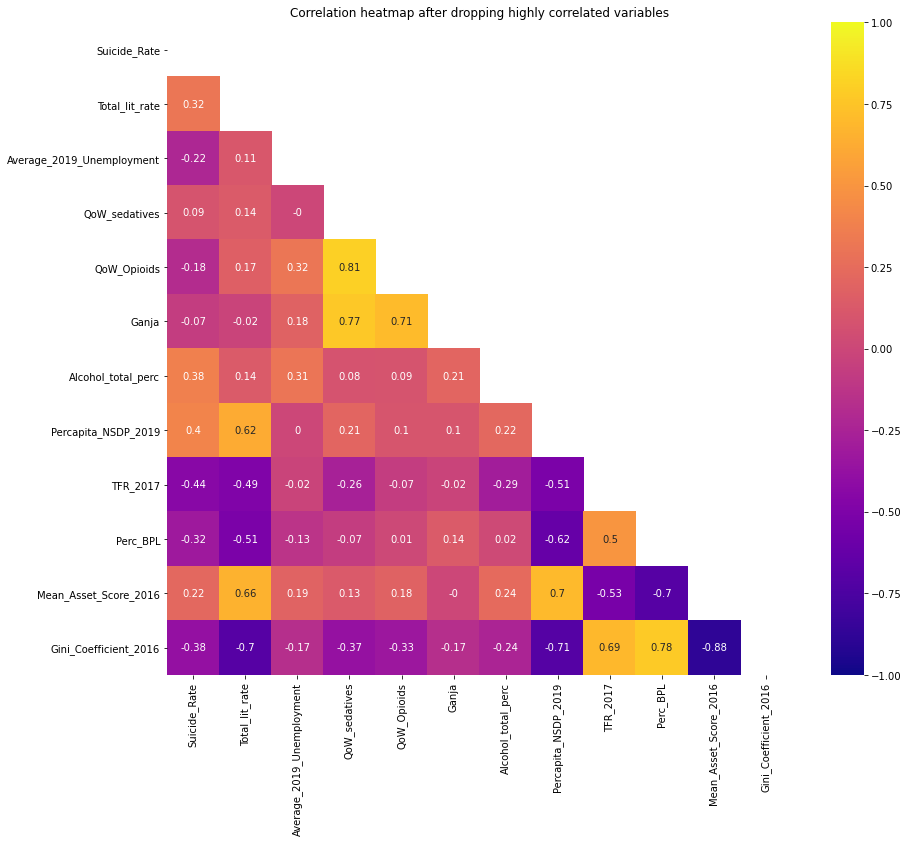

In [73]:
corr = master.corr()

mask = np.triu( np.ones_like(corr, dtype= np.bool))
plt.figure(figsize = (14,12))
## sns.set(font_scale=1.2) ## instead of annot_kws={‘size’:12}
sns.heatmap(round(corr,2), annot=True, mask=mask, cmap='plasma', vmin=-1, vmax=1, annot_kws={'size':10})
plt.title("Correlation heatmap after dropping highly correlated variables");

In [74]:
corr_pairs = corr.unstack()
sorted_pairs = corr_pairs.sort_values()
strong_pairs = sorted_pairs[(abs(sorted_pairs) > 0.5) & (abs(sorted_pairs) < 1)]  #direction not represented as we have taken absolute values
round(strong_pairs,2)

Mean_Asset_Score_2016  Gini_Coefficient_2016   -0.88
Gini_Coefficient_2016  Mean_Asset_Score_2016   -0.88
Percapita_NSDP_2019    Gini_Coefficient_2016   -0.71
Gini_Coefficient_2016  Percapita_NSDP_2019     -0.71
                       Total_lit_rate          -0.70
Total_lit_rate         Gini_Coefficient_2016   -0.70
Perc_BPL               Mean_Asset_Score_2016   -0.70
Mean_Asset_Score_2016  Perc_BPL                -0.70
Perc_BPL               Percapita_NSDP_2019     -0.62
Percapita_NSDP_2019    Perc_BPL                -0.62
TFR_2017               Mean_Asset_Score_2016   -0.53
Mean_Asset_Score_2016  TFR_2017                -0.53
Total_lit_rate         Perc_BPL                -0.51
Perc_BPL               Total_lit_rate          -0.51
Percapita_NSDP_2019    TFR_2017                -0.51
TFR_2017               Percapita_NSDP_2019     -0.51
Perc_BPL               TFR_2017                 0.50
TFR_2017               Perc_BPL                 0.50
Total_lit_rate         Percapita_NSDP_2019    

#### Observations: <br> 
<i> For the purpose of this analysis correlation above 0.7 and below -0.7 are considered to be strong </i>
1. Gini coefficient (measure of distribution of income across a population) has a strong negative correlation with Mean asset score, Per Capita GDP and Literacy rates.
2. Gini coefficient has a strong positive correlation with Percentage BPL.
3. Mean asset score has a negative correlation with Percentage BPL.
4. Various substance abuse scores are all strongly correlated with each other. 
5. Percapita GDP and Mean asset score have a strong positive correlation.

<i> For the purpose of this analysis correlation between 0.5 to 0.7 and -0.7 to -0.5 are considered to be moderate </i> <br>
1. Gini coefficient and total fertility rates have a moderate positive correlation.
2. Total literacy rate has a moderate positive correlation with Per capita GDP and Mean asset score.
3. Total fertility rate has a moderate negative correlation with Per capita GDP and Mean asset score.
4. Percentage below poverty line has a moderate negative correlation with per capita GDP and Literacy rate.

<b> <u> Suicide rate </u> </b> <br>
Suicide rate shows a weak negative correlation with Total Fertility Rate (-0.44) and Gini coefficient (-0.38). <br>
It shows a weak positive correlation with Alcoholic Total Percentage (0.38)

##### Null treatment

In [75]:
master.isna().sum()

Suicide_Rate                 0
Total_lit_rate               0
Average_2019_Unemployment    9
QoW_sedatives                0
QoW_Opioids                  0
Ganja                        0
Alcohol_total_perc           0
Percapita_NSDP_2019          3
TFR_2017                     0
Perc_BPL                     5
Mean_Asset_Score_2016        6
Gini_Coefficient_2016        6
dtype: int64

In [76]:
master[master['Mean_Asset_Score_2016'].isna()]

,Suicide_Rate,Total_lit_rate,Average_2019_Unemployment,QoW_sedatives,QoW_Opioids,Ganja,Alcohol_total_perc,Percapita_NSDP_2019,TFR_2017,Perc_BPL,Mean_Asset_Score_2016,Gini_Coefficient_2016
State_UT,,,,,,,,,,,,
A & N ISLANDS,45.5,86.6,NaN,0.16,0.5,0.1,47.1,155046.234848,1.5,NaN,NaN,NaN
CHANDIGARH,11.1,86.0,NaN,0.28,0.9,0.4,32.3,234997.612958,1.8,NaN,NaN,NaN
D & N HAVELI,17.1,76.2,NaN,0.05,0.5,0.1,19.5,NaN,2.3,NaN,NaN,NaN
DAMAN & DIU,10.9,87.1,NaN,0.03,2.5,1.3,29.4,NaN,1.7,NaN,NaN,NaN
LAKSHADWEEP,0.0,91.8,NaN,0.21,0.6,0.1,0.1,NaN,1.9,NaN,NaN,NaN
PUDUCHERRY,32.5,85.8,1.541667,0.74,0.6,0.0,20.0,141918.255672,1.6,9.7,NaN,NaN


In [77]:
Perc_BPL_median = master.Perc_BPL.median()

In [78]:
Percapita_NSDP_2019_median = master.Percapita_NSDP_2019.median()

In [79]:
master.Perc_BPL = np.where(master['Perc_BPL'].isna(),Perc_BPL_median,master['Perc_BPL'])

In [80]:
master.Percapita_NSDP_2019 = np.where(master['Percapita_NSDP_2019'].isna(),Percapita_NSDP_2019_median,master['Percapita_NSDP_2019'])

In [81]:
Average_2019_Unemployment_median = master.Average_2019_Unemployment.median()

In [82]:
master.Average_2019_Unemployment = np.where(master['Average_2019_Unemployment'].isna(),Average_2019_Unemployment_median,master['Average_2019_Unemployment'])

In [83]:
Mean_Asset_Score_2016_median = master.Mean_Asset_Score_2016.median()
master.Mean_Asset_Score_2016 = np.where(master['Mean_Asset_Score_2016'].isna(),Mean_Asset_Score_2016_median,master['Mean_Asset_Score_2016'])

Gini_Coefficient_2016_median = master.Gini_Coefficient_2016.median()
master.Gini_Coefficient_2016 = np.where(master['Gini_Coefficient_2016'].isna(),Gini_Coefficient_2016_median,master['Gini_Coefficient_2016'])

In [84]:
master.isna().sum()

Suicide_Rate                 0
Total_lit_rate               0
Average_2019_Unemployment    0
QoW_sedatives                0
QoW_Opioids                  0
Ganja                        0
Alcohol_total_perc           0
Percapita_NSDP_2019          0
TFR_2017                     0
Perc_BPL                     0
Mean_Asset_Score_2016        0
Gini_Coefficient_2016        0
dtype: int64

##### Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
master_std = sc.fit_transform(master)
master_std = pd.DataFrame(master_std,columns=master.columns, index=master.index)

In [86]:
master_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Suicide_Rate,36.0,1.356939e-16,1.014185,-1.292368,-0.700732,-0.169518,0.429671,3.289665
Total_lit_rate,36.0,8.172475e-16,1.014185,-1.845936,-0.878676,-0.110730,0.973774,1.929310
Average_2019_Unemployment,36.0,-4.625929e-16,1.014185,-1.219083,-0.606964,-0.314244,0.358971,3.578881
QoW_sedatives,36.0,-7.093092e-17,1.014185,-0.746257,-0.543647,-0.375524,-0.034966,4.254337
QoW_Opioids,36.0,4.317534e-17,1.014185,-0.854064,-0.630861,-0.463458,0.248004,2.940400
Ganja,36.0,1.233581e-16,1.014185,-0.891764,-0.776491,-0.488309,0.736466,3.315697
Alcohol_total_perc,36.0,-2.143347e-16,1.014185,-1.667982,-0.808294,0.123035,0.825425,2.194385
Percapita_NSDP_2019,36.0,1.233581e-16,1.014185,-1.385204,-0.765526,-0.126596,0.380187,3.443598
TFR_2017,36.0,-8.635068e-17,1.014185,-1.629048,-0.800133,-0.385676,0.650468,2.515527
Perc_BPL,36.0,-1.788693e-16,1.014185,-1.302324,-0.787965,-0.348151,0.479295,2.156551


In [87]:
master_std.Suicide_Rate = master_std.Suicide_Rate * 10

In [88]:
master_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Suicide_Rate,36.0,1.677670e-15,10.141851,-12.923684,-7.007322,-1.695185,4.296705,32.896651
Total_lit_rate,36.0,8.172475e-16,1.014185,-1.845936,-0.878676,-0.110730,0.973774,1.929310
Average_2019_Unemployment,36.0,-4.625929e-16,1.014185,-1.219083,-0.606964,-0.314244,0.358971,3.578881
QoW_sedatives,36.0,-7.093092e-17,1.014185,-0.746257,-0.543647,-0.375524,-0.034966,4.254337
QoW_Opioids,36.0,4.317534e-17,1.014185,-0.854064,-0.630861,-0.463458,0.248004,2.940400
Ganja,36.0,1.233581e-16,1.014185,-0.891764,-0.776491,-0.488309,0.736466,3.315697
Alcohol_total_perc,36.0,-2.143347e-16,1.014185,-1.667982,-0.808294,0.123035,0.825425,2.194385
Percapita_NSDP_2019,36.0,1.233581e-16,1.014185,-1.385204,-0.765526,-0.126596,0.380187,3.443598
TFR_2017,36.0,-8.635068e-17,1.014185,-1.629048,-0.800133,-0.385676,0.650468,2.515527
Perc_BPL,36.0,-1.788693e-16,1.014185,-1.302324,-0.787965,-0.348151,0.479295,2.156551


### K-means clustering

##### Calculating suitable K

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

wss =[] 
sil_score = []
for i in range(2,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(master_std)
    wss.append(KM.inertia_)
    labels = KM.labels_
    sil_score.append(silhouette_score(master_std,labels))

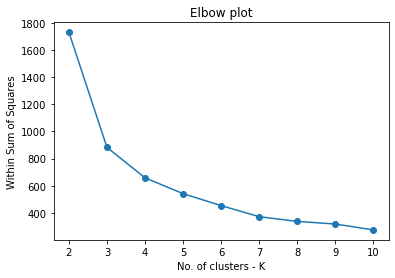

In [90]:
plt.plot(range(2,11), wss, marker = 'o')
plt.xlabel('No. of clusters - K')
plt.ylabel('Within Sum of Squares')
plt.title("Elbow plot");

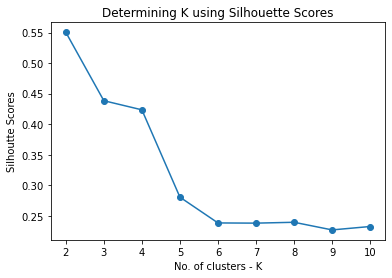

In [91]:
plt.plot(range(2,11),sil_score,marker ='o')
plt.xlabel('No. of clusters - K')
plt.ylabel('Silhoutte Scores')
plt.title("Determining K using Silhouette Scores");

Observation : 
    Silhouette score is way less than 1 with just scaled data. 
    In the second iteration, giving suicide rate more importance by multiplying by 10.

<b> Observation: </b> <br> 
The wss plot has a bend at 4 clusters. <br>
SScore is highest for 2 clusters. We will do 2,3,4 clusters and look at the characteristics for each dataset.

<i> Reference: 
https://www.researchgate.net/publication/279040193_Recovering_the_number_of_clusters_in_data_sets_with_noise_features_using_feature_rescaling_factors  </i>

##### Creating additional features in original dataset with labels formed by Kmeans algorithm

In [92]:
KM2 = KMeans(n_clusters=2,random_state=1)
KM2.fit(master_std)
labels = KM2.labels_
master['Cluster_kmeans2'] = labels

KM3 = KMeans(n_clusters=3,random_state=1)
KM3.fit(master_std)
labels = KM3.labels_
master['Cluster_kmeans3'] = labels

KM4 = KMeans(n_clusters=4,random_state=1)
KM4.fit(master_std)
labels = KM4.labels_
master['Cluster_kmeans4'] = labels

#### Cluster profiling

##### K-means = 2 profiling

In [93]:
master.Cluster_kmeans2.value_counts().sort_index()

0    30
1     6
Name: Cluster_kmeans2, dtype: int64

In [94]:
master.Cluster_kmeans3.value_counts().sort_index()

0     5
1    15
2    16
Name: Cluster_kmeans3, dtype: int64

In [95]:
master.Cluster_kmeans4.value_counts().sort_index()

0     4
1    15
2    16
3     1
Name: Cluster_kmeans4, dtype: int64

In [96]:
clust_profile_2 = master.groupby('Cluster_kmeans2').mean()
clust_profile_2

,Suicide_Rate,Total_lit_rate,Average_2019_Unemployment,QoW_sedatives,QoW_Opioids,Ganja,Alcohol_total_perc,Percapita_NSDP_2019,TFR_2017,Perc_BPL,Mean_Asset_Score_2016,Gini_Coefficient_2016,Cluster_kmeans3,Cluster_kmeans4
Cluster_kmeans2,,,,,,,,,,,,,,
0,9.32,76.883333,8.642778,0.385000,1.693333,1.510000,25.236667,122245.706717,2.046667,18.883333,0.388967,0.276400,1.500000,1.500000
1,30.40,80.850000,5.444444,0.731667,1.316667,1.733333,35.066667,154703.129003,1.683333,14.800000,0.399167,0.247167,0.333333,0.833333


In [97]:
clust_profile_3 = master.groupby('Cluster_kmeans3').mean()
clust_profile_3

,Suicide_Rate,Total_lit_rate,Average_2019_Unemployment,QoW_sedatives,QoW_Opioids,Ganja,Alcohol_total_perc,Percapita_NSDP_2019,TFR_2017,Perc_BPL,Mean_Asset_Score_2016,Gini_Coefficient_2016,Cluster_kmeans2,Cluster_kmeans4
Cluster_kmeans3,,,,,,,,,,,,,,
0,32.360000,83.620000,5.830000,0.834000,1.440000,2.0400,36.000000,155515.476764,1.680000,15.920000,0.407600,0.242600,1.0000,0.6
1,4.386667,74.546667,8.866667,0.548667,2.326667,1.9000,20.613333,88910.722342,2.226667,21.493333,0.377833,0.286033,0.0000,1.0
2,14.650000,78.456250,8.112500,0.221250,1.037500,1.0625,29.893750,155271.984787,1.856250,15.831250,0.397406,0.266969,0.0625,2.0


In [98]:
clust_profile_3_std = master.groupby('Cluster_kmeans3').std()
clust_profile_3_std

,Suicide_Rate,Total_lit_rate,Average_2019_Unemployment,QoW_sedatives,QoW_Opioids,Ganja,Alcohol_total_perc,Percapita_NSDP_2019,TFR_2017,Perc_BPL,Mean_Asset_Score_2016,Gini_Coefficient_2016,Cluster_kmeans2,Cluster_kmeans4
Cluster_kmeans3,,,,,,,,,,,,,,
0,8.272122,8.713897,2.450557,1.187910,2.047682,3.154045,15.537857,64633.486190,0.443847,13.716851,0.099881,0.075962,0.00,1.341641
1,2.724981,9.209612,4.147846,0.560445,2.339862,1.529239,17.474220,40230.924736,0.559932,11.170143,0.092466,0.066285,0.00,0.000000
2,3.084585,7.280565,7.049908,0.152091,0.779637,1.390384,13.869750,80112.114673,0.326535,7.599274,0.083740,0.052321,0.25,0.000000


In [99]:
clust_profile_3_std.to_excel("clust_profile_3_std_suiciderate10times.xlsx")

In [119]:
master['Total_Suicides'] = Total_suicides
master['Pop_in_lakhs'] = State_Pop

In [106]:
master.to_excel("masterdata_with_clusternumbers.xlsx")

In [107]:
clust_profile_3['count_of_states'] = master.Cluster_kmeans3.value_counts().sort_index()

In [108]:
clust_profile_3['CV_suicide_rate'] = (master.groupby('Cluster_kmeans3')['Suicide_Rate'].std()) / clust_profile_3['Suicide_Rate']
clust_profile_3['std_suicide_rate'] = master.groupby('Cluster_kmeans3')['Suicide_Rate'].std()

In [109]:
clust_profile_3.drop(["Cluster_kmeans2", "Cluster_kmeans4"], axis=1, inplace=True)

In [110]:
clust_profile_3 = clust_profile_3[['Suicide_Rate', 'count_of_states', 'std_suicide_rate', 'CV_suicide_rate',
       'Total_lit_rate', 'Average_2019_Unemployment',
       'QoW_sedatives', 'QoW_Opioids', 'Ganja', 'Alcohol_total_perc',
       'Percapita_NSDP_2019', 'TFR_2017', 'Perc_BPL', 'Mean_Asset_Score_2016',
       'Gini_Coefficient_2016']]

In [111]:
clust_profile_3.sort_values(by='Suicide_Rate').round(2).to_excel("cluster_profile_kmeans3_suiciderate10times.xlsx")
clust_profile_3.sort_values(by='Suicide_Rate').round(2)

,Suicide_Rate,count_of_states,std_suicide_rate,CV_suicide_rate,Total_lit_rate,Average_2019_Unemployment,QoW_sedatives,QoW_Opioids,Ganja,Alcohol_total_perc,Percapita_NSDP_2019,TFR_2017,Perc_BPL,Mean_Asset_Score_2016,Gini_Coefficient_2016
Cluster_kmeans3,,,,,,,,,,,,,,,
1,4.39,15,2.72,0.62,74.55,8.87,0.55,2.33,1.90,20.61,88910.72,2.23,21.49,0.38,0.29
2,14.65,16,3.08,0.21,78.46,8.11,0.22,1.04,1.06,29.89,155271.98,1.86,15.83,0.40,0.27
0,32.36,5,8.27,0.26,83.62,5.83,0.83,1.44,2.04,36.00,155515.48,1.68,15.92,0.41,0.24


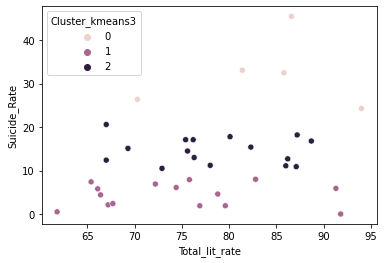

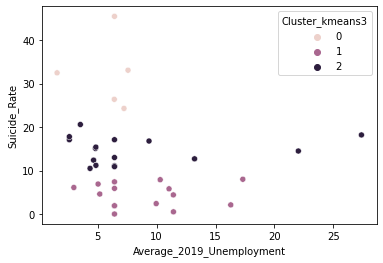

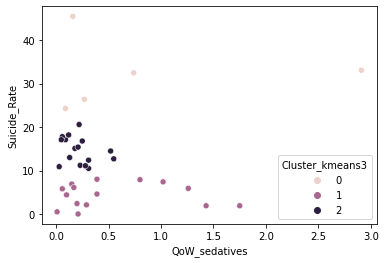

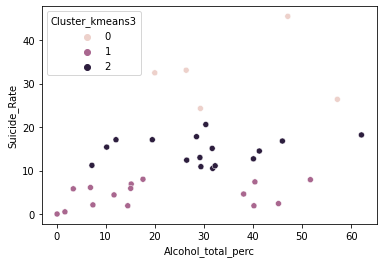

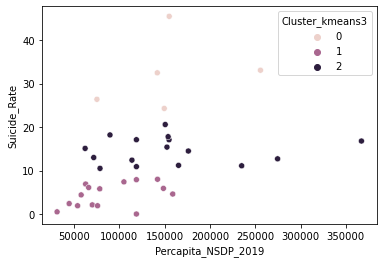

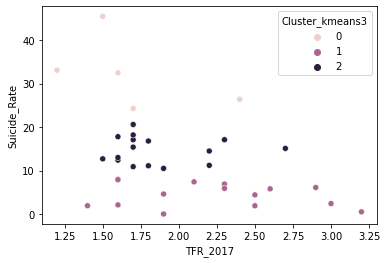

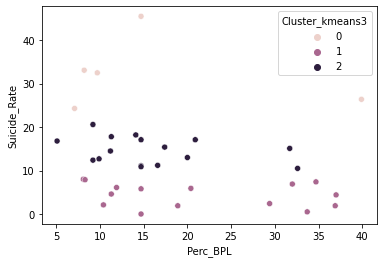

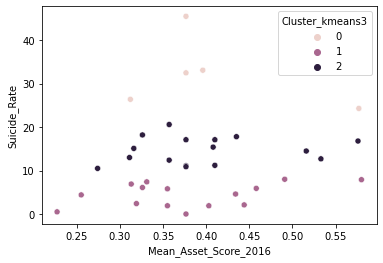

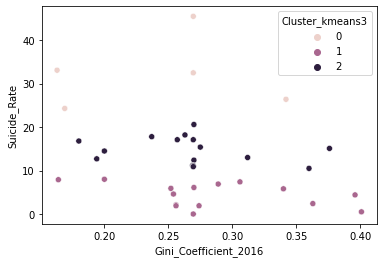

In [112]:
x_vars = ['Total_lit_rate', 'Average_2019_Unemployment', 'QoW_sedatives', 'Alcohol_total_perc', 'Percapita_NSDP_2019','TFR_2017', 
         'Perc_BPL','Mean_Asset_Score_2016','Gini_Coefficient_2016']

for i in x_vars:
    sns.scatterplot(data=master, x=i, y='Suicide_Rate', hue='Cluster_kmeans3')
    plt.show()

In [113]:
master.columns

Index(['Suicide_Rate', 'Total_lit_rate', 'Average_2019_Unemployment',
       'QoW_sedatives', 'QoW_Opioids', 'Ganja', 'Alcohol_total_perc',
       'Percapita_NSDP_2019', 'TFR_2017', 'Perc_BPL', 'Mean_Asset_Score_2016',
       'Gini_Coefficient_2016', 'Cluster_kmeans2', 'Cluster_kmeans3',
       'Cluster_kmeans4', 'Total_Suicides', 'State_population'],
      dtype='object')

### Visualizing clusters

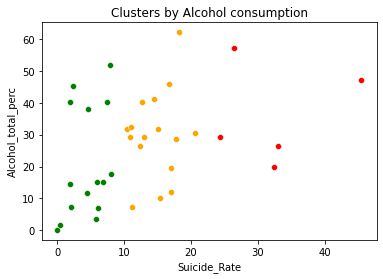

In [114]:
#filter rows of original data
filtered_cluster1 = master[master['Cluster_kmeans3'] == 0]

filtered_cluster2 = master[master['Cluster_kmeans3'] == 1]

filtered_cluster3 = master[master['Cluster_kmeans3'] == 2]

#Plotting the results
sns.scatterplot(x=filtered_cluster1.Suicide_Rate , y=filtered_cluster1.Alcohol_total_perc , color = 'red')
sns.scatterplot(x=filtered_cluster2.Suicide_Rate , y=filtered_cluster2.Alcohol_total_perc, color = 'green')
sns.scatterplot(x=filtered_cluster3.Suicide_Rate , y=filtered_cluster3.Alcohol_total_perc, color = 'orange')
plt.title("Clusters by Alcohol consumption")
plt.show()



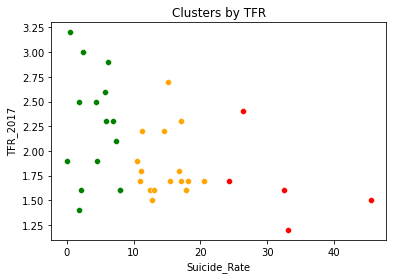

In [115]:
#Plotting the results
sns.scatterplot(x=filtered_cluster1.Suicide_Rate , y=filtered_cluster1.TFR_2017 , color = 'red')
sns.scatterplot(x=filtered_cluster2.Suicide_Rate , y=filtered_cluster2.TFR_2017, color = 'green')
sns.scatterplot(x=filtered_cluster3.Suicide_Rate , y=filtered_cluster3.TFR_2017, color = 'orange')
plt.title("Clusters by TFR")
plt.show()


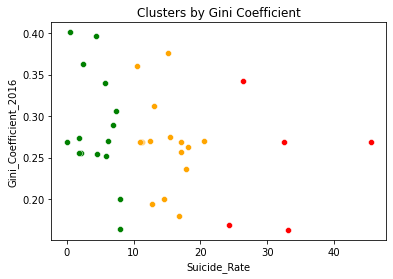

In [116]:
#Plotting the results
sns.scatterplot(x=filtered_cluster1.Suicide_Rate , y=filtered_cluster1.Gini_Coefficient_2016 , color = 'red')
sns.scatterplot(x=filtered_cluster2.Suicide_Rate , y=filtered_cluster2.Gini_Coefficient_2016, color = 'green')
sns.scatterplot(x=filtered_cluster3.Suicide_Rate , y=filtered_cluster3.Gini_Coefficient_2016, color = 'orange')
plt.title("Clusters by Gini Coefficient")
plt.show()


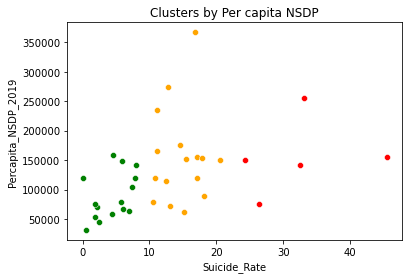

In [117]:
#Plotting the results
sns.scatterplot(x=filtered_cluster1.Suicide_Rate , y=filtered_cluster1.Percapita_NSDP_2019 , color = 'red')
sns.scatterplot(x=filtered_cluster2.Suicide_Rate , y=filtered_cluster2.Percapita_NSDP_2019, color = 'green')
sns.scatterplot(x=filtered_cluster3.Suicide_Rate , y=filtered_cluster3.Percapita_NSDP_2019, color = 'orange')
plt.title("Clusters by Per capita NSDP")
plt.show()

In [118]:
master[master['Cluster_kmeans3'] == 0]['Suicide_Rate']

State_UT
CHHATTISGARH     26.4
KERALA           24.3
SIKKIM           33.1
A & N ISLANDS    45.5
PUDUCHERRY       32.5
Name: Suicide_Rate, dtype: float64